In [1]:
import os, sys, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [2]:
pd.options.display.max_columns = None

In [ ]:
df_test = pd.read_csv('../data/2020_Competition_Holdout .csv')

In [3]:
df_train = pd.read_csv('../data/2020_Competition_Training.csv')

/Users/renmengyuan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (80,193) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.set_option('display.max_rows', 1000)

In [35]:
# Dealing with missing value
ls_columns = df_train.columns.tolist()
ls_columns.remove("transportation_issues")
# Columns with missing value
columns_with_missing = []
for column in ls_columns:
    if df_train[column].isnull().sum()>0: 
        columns_with_missing.append({"column":column, "missing":df_train[column].isnull().sum()}) 
df_missing_distribution = pd.DataFrame.from_dict(columns_with_missing) 
df_missing_distribution.sort_values("missing",ascending=False).reset_index(inplace=True) 

from sklearn.impute import SimpleImputer
# rank 1 blood fat screen or control
# rank 2 data from cons about demos
# rank 3 cms data insurance factor data.
imputer_frequent = SimpleImputer(strategy="most_frequent")
for column in df_missing_distribution["column"]:
    try:
        if df_train[column].nunique()>=30:
            df_train[column].fillna(df_train[column].mean(),inplace=True)
        else:
            df_train[column].fillna(df_train[column].value_counts().index[0],inplace=True)
    except:
        print(column)

In [39]:
# Dealing with missing value
ls_columns = df_test.columns.tolist()
# Columns with missing value
columns_with_missing = []
for column in ls_columns:
    if df_test[column].isnull().sum()>0: 
        columns_with_missing.append({"column":column, "missing":df_test[column].isnull().sum()}) 
df_missing_distribution = pd.DataFrame.from_dict(columns_with_missing) 
from sklearn.impute import SimpleImputer
# rank 1 blood fat screen or control
# rank 2 data from cons about demos
# rank 3 cms data insurance factor data.
imputer_frequent = SimpleImputer(strategy="most_frequent")
for column in df_missing_distribution["column"]:
    try:
        if df_test[column].nunique()>=30:
            df_test[column].fillna(df_test[column].mean(),inplace=True)
        else:
            df_test[column].fillna(df_test[column].value_counts().index[0],inplace=True)
    except:
        print(column)

KeyError: 'column'

In [12]:
from sklearn.impute import SimpleImputer
# rank 1 blood fat screen or control
# rank 2 data from cons about demos
# rank 3 cms data insurance factor data.
imputer_frequent = SimpleImputer(strategy="most_frequent")
for column in df_missing_distribution["column"]:
    try:
        if df_train[column].nunique()>=30:
            df_train[column].fillna(df_train[column].mean(),inplace=True)
        else:
            df_train[column].fillna(df_train[column].value_counts().index[0],inplace=True)
    except:
        print(column)

## Start Here

In [18]:
X_train = pd.read_csv('../data/X_train.csv')

In [19]:
# TARGET
y_train = X_train['transportation_issues'].copy()
y_train = y_train.astype("int")

In [20]:
# TRAIN 75% PREDICT 25% - Evaluation set
X_train = pd.get_dummies(X_train)

idxT = X_train.index[:8*len(X_train)//10]
idxV = X_train.index[8*len(X_train)//10:]
cols = list(X_train.columns)

In [21]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
from xgboost.sklearn import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

In [22]:
X_train = X_train.drop(columns = ['transportation_issues','Unnamed: 0'])

In [26]:
X_train.head()

,est_age,smoker_current_ind,smoker_former_ind,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,betos_o1g_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,betos_t1e_pmpm_ct,betos_t1h_pmpm_ct,betos_t2a_pmpm_ct,betos_y2_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,ccsp_125_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_204_ind,ccsp_205_ind,ccsp_212_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,ccsp_242_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_hospice_ind,cms_low_income_ind,cms_ma_risk_score_nbr,cms_partd_ra_factor_amt,cms_risk_adj_payment_rate_a_amt,cms_risk_adj_payment_rate_b_amt,cms_risk_adjustment_factor_a_amt,cms_rx_risk_score_nbr,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,cons_hcaccprf_h,cons_hcaccprf_p,cons_n2029_y,cons_n2mob,cons_n2pbl,cons_n2pmv,cons_n65p_y,cons_online_buyer,cons_ret_y,cons_retail_buyer,cons_veteran_y,credit_bal_1stmtg_30to59dpd,credit_bal_1stmtg_60to89dpd,credit_bal_1stmtg_collections,credit_bal_1stmtg_severederog,credit_bal_1stmtgcredit_60dpd,credit_bal_agency1stmorg_collectio,credit_bal_agencyfirstmtg_60dpd,credit_bal_agencyfirstmtg_new,credit_bal_autobank,credit_bal_autobank_new,credit_bal_autofinance,credit_bal_autofinance_new,credit_bal_bankcard_severederog,credit_bal_consumerfinance,credit_bal_consumerfinance_new,credit_bal_heloc_60dpd,credit_bal_heloc_severederog,credit_bal_mtg_90to119dpd,credit_bal_mtg_bankruptcy,credit_bal_mtg_severederog,credit_bal_mtgcredit_new,credit_bal_nonagn1stmorg_30to59dpd,credit_bal_nonagn1stmorg_60to89dpd,credit_bal_nonagn1stmorg_90to119dp,credit_bal_nonagn1stmorg_bankruptc,credit_bal_nonagn1stmorg_collectio,credit_bal_nonagnfirstmtg_60dpd,credit_bal_nonmtgcredit_60dpd,credit_bal_studentloan_60dpd,credit_bal_totalallcredit_60dpd,credit_bal_totalallcredit_60to89dpd,credit_bal_totalallcredit_90to119dpd,credit_bal_totalallcredit_new,credit_hh_1stmtg_severederog,credit_hh_1stmtgcredit,credit_hh_1stmtgcredit_new,credit_hh_agencyfirstmtg,credit_hh_agencyfirstmtg_new,credit_hh_autobank,credit_hh_autobank_new,credit_hh_autofinance,credit_hh_autofinance_new,credit_hh_bankcard_severederog,credit_hh_bankcardcredit_60dpd,credit_hh_consumerfinance,credit_hh_consumerfinance_new,credit_hh_mtg_severederog,credit_hh_mtgcredit_new,credit_hh_nonagnfirstmtg,credit_hh_nonmtgcredit_60dpd,credit_hh_studentloan,credit_hh_studentloan_60dpd,credit_hh_totalallcredit_bankruptcy,credit_hh_totalallcredit_collections,credit_hh_totalallcredit_severederog,credit_highcrd_consumerfinance_new,credit_minmob_1stmtgcredit,credit_minmob_agencyfirstmtg,credit_minmob_mtgcredit,credit_minmob_nonagn,credit_num_1stmtg_30to59dpd,credit_num_1stmtg_60to89dpd,credit_num_1stmtg_bankruptcy,credit_num_1stmtg_collections,credit_num_1stmtg_severederog,credit_num_1stmtgcredit,credit_num_1stmtgcredit_new,credit_num_agency1stmorg_collectio,credit_num_agencyfirstmtg,credit_num_agencyfirstmtg_60dpd,credit_num_agencyfirstmtg_new,credit_num_autobank,credit_num_autobank_new,credit_num_autofinance,credit_num_autofinance_new,credit_num_bankcard_severederog,credit_num_consumerfinance,credit_num_consumerfinance_new,credit_num_heloc_60dpd,credit_num_heloc_severederog,credit_num_mtg_60to89dpd,credit_num_mtg_90to119dpd,credit_num_mtg_collections,credit_num_mtg_severederog,credit_num_mtgcredit_new,credit_num_nonagn1stmorg_30to59dpd,credit_num_nonagn1stmorg_60to89dpd,credit_num_nonagn1stmorg_90to119dp,credit_num_nonagn1stmorg_bankruptc,credit_num_nonagn1stmorg_collectio,credit_num_n

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = "lbfgs",random_state=42).fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
y_prob = clf.predict_proba(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
(y_test==y_pred).mean() #accuracy 86.87%

#False negative values are larger than the false positive values.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

print("ROC_AUC Score:")
print(roc_auc_score(y_test, y_pred))

#ROC Plot
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_plot(fpr, tpr, roc_auc)

In [9]:
# This script shows you how to make a submission using a few
# useful Python libraries.
# It gets a public leaderboard score of 0.76077.
# Maybe you can tweak it and do better...?

import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

feature_columns_to_use = X_train.columns
# nonnumeric_columns = ['Sex']


# XGBoost doesn't (yet) handle categorical features automatically, so we need to change
# them to columns of integer values.
# See http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing for more
# details and options
# le = LabelEncoder()
# for feature in nonnumeric_columns:
#     big_X_imputed[feature] = le.fit_transform(big_X_imputed[feature])

# Prepare the inputs for the model
train_X = X_train.loc[idxT,cols].as_matrix()
test_X = X_train.loc[idxV,cols].as_matrix()
train_y = y_train[idxT]

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
# gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(train_X, train_y)

# gbm = xgb.XGBClassifier()
# gbm_params = {
#     'learning_rate': [0.05, 0.1],
#     'n_estimators': [300, 1000],
#     'max_depth': [2, 3, 10],
# }
# cv = StratifiedKFold(train_y)
# grid = GridSearchCV(gbm, gbm_params,scoring='roc_auc',cv=cv,verbose=10,n_jobs=-1)
# grid.fit(train_X, train_y)

# print (grid.best_params_)

# predictions = grid.best_estimator_.predict(test_X)
train_X = train_X.fillna(0)
steps1 = [('poly_features', PolynomialFeatures(3, interaction_only=True)),
         ('XGBoost', xgb.XGBClassifier(max_depth=6, n_estimators=500, learning_rate=0.05))]

pipeline1 = Pipeline(steps=steps1)

# xgboost model with cubic features
pipeline1.fit(train_X, train_y)
print('Accuracy (xgboost-Poly Features (cubic)): {:.4f}'.format(pipeline1.score(train_X, train_y)))         

/Users/renmengyuan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/renmengyuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/renmengyuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

In [1]:
predictions = pipeline1.predict(test_X)

# Kaggle needs the submission to have a certain format;
# see https://www.kaggle.com/c/titanic-gettingStarted/download/gendermodel.csv
# for an example of what it's supposed to look like.
# submission = pd.DataFrame({ 'PassengerId': test_df['PassengerId'],
#                             'Survived': predictions })
# submission.to_csv("submission.csv", index=False)

NameError: name 'X_train' is not defined

In [59]:
# Polynomial feature transformation 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# define the pipeline
trans = PolynomialFeatures(degree=3)
model = xgb.XGBClassifier( 
    n_estimators=5000,
    max_depth=3, 
    learning_rate=0.01, 
    subsample=0.8,
    colsample_bytree=0.8, 
    missing=-1, 
    eval_metric='auc',
    # USE CPU
    #nthread=4,
    #tree_method='hist' 
    # USE GPU
#     tree_method='gpu_hist' 
)
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train.loc[idxT,cols], y_train[idxT], scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/Users/renmengyuan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [69]:
Xn_trans_train = poly.fit_transform(Xn_train.loc[idxV,cols])

In [72]:
df_Xn_trans_train = pd.DataFrame(data=Xn_trans_train)

In [53]:
y_pred = h.predict(X_train.loc[idxV,cols])

In [54]:
from sklearn.metrics import confusion_matrix
y_test = y_train[idxV]
print(confusion_matrix(y_test,y_pred))
(y_test==y_pred).mean() #accuracy 86.87%

[[11809   116]
 [ 1868   122]]


0.8574200503054258

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5257895346754738

ROC_AUC Score:
0.5257895346754738


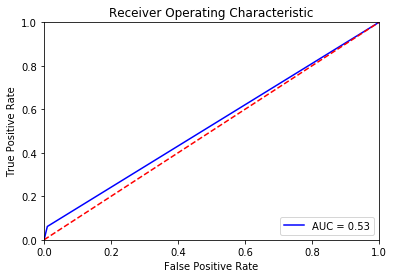

In [56]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

print("ROC_AUC Score:")
print(roc_auc_score(y_test, y_pred))

#ROC Plot
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
# X_train = X_train.drop(["transportation_issues"], axis=1)
print("XGBoost version:", xgb.__version__)

clf = xgb.XGBClassifier( 
    n_estimators=5000,
    max_depth=3, 
    learning_rate=0.01, 
    subsample=0.8,
    colsample_bytree=0.8, 
    missing=-1, 
    eval_metric='auc',
    # USE CPU
    #nthread=4,
    #tree_method='hist' 
    # USE GPU
#     tree_method='gpu_hist' 
)

h = clf.fit(X_train.loc[idxT,cols], y_train[idxT], 
    eval_set=[(X_train.loc[idxV,cols],y_train[idxV])],
    verbose=50, early_stopping_rounds=1000)

XGBoost version: 1.1.1
[0]	validation_0-auc:0.64853
Will train until validation_0-auc hasn't improved in 1000 rounds.
[50]	validation_0-auc:0.68790
[100]	validation_0-auc:0.69317
[150]	validation_0-auc:0.69603
[200]	validation_0-auc:0.69931
[250]	validation_0-auc:0.70328
[300]	validation_0-auc:0.70690
[350]	validation_0-auc:0.71017
[400]	validation_0-auc:0.71300
[450]	validation_0-auc:0.71516
[500]	validation_0-auc:0.71692
[550]	validation_0-auc:0.71843
[600]	validation_0-auc:0.71964
[650]	validation_0-auc:0.72055
[700]	validation_0-auc:0.72135
[750]	validation_0-auc:0.72208
[800]	validation_0-auc:0.72257
[850]	validation_0-auc:0.72322
[900]	validation_0-auc:0.72379
[950]	validation_0-auc:0.72432
[1000]	validation_0-auc:0.72470
[1050]	validation_0-auc:0.72502
[1100]	validation_0-auc:0.72544
[1150]	validation_0-auc:0.72564
[1200]	validation_0-auc:0.72589
[1250]	validation_0-auc:0.72608
[1300]	validation_0-auc:0.72632
[1350]	validation_0-auc:0.72647
[1400]	validation_0-auc:0.72663
[1450]

AttributeError: 'XGBClassifier' object has no attribute 'pre'

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize
import matplotlib.pyplot as plt
plt.ion()

# For reproducibility 
np.random.seed(123)

In [77]:
X_train = pd.get_dummies(X_train)

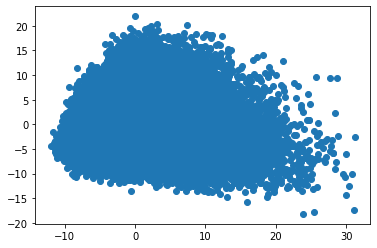

In [17]:
pca = PCA(2)
Xn_train = scale(X_train)
low_d = pca.fit_transform(Xn_train)
plt.scatter(low_d[:,0], low_d[:,1])

In [40]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train.drop('transportation_issues',axis=1))

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
Y_sklearn = sklearn_pca.fit_transform(X_std)

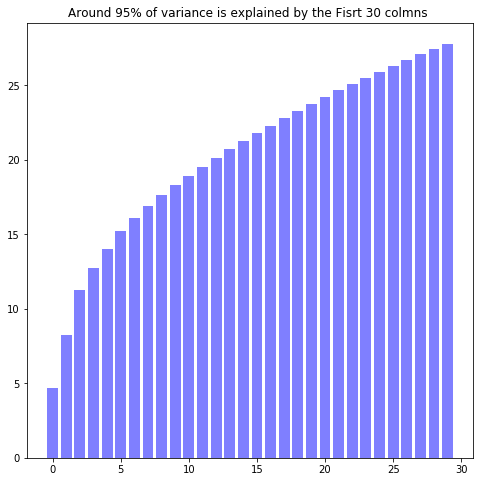

In [41]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(30), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("Around 95% of variance is explained by the Fisrt 30 colmns ");

In [42]:
X_reduced2 = Y_sklearn

In [43]:
train = pd.DataFrame(X_reduced2)
train['transportation_issues'] =  X_train['transportation_issues'].reset_index().transportation_issues
train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,transportation_issues
0,-1.512063,0.462475,-10.549223,-3.345539,0.238794,3.664462,0.109616,-3.065516,-1.396657,-2.223363,1.340368,-1.756171,-0.599066,0.547992,0.699171,-2.096414,-1.426684,-0.068091,-1.044150,2.103433,0.697597,1.421040,1.313919,-1.287233,-0.526732,0.108759,0.190517,-0.257750,0.412248,1.281347,0
1,-1.061643,-2.321124,-3.077257,3.909448,3.485443,1.399564,1.216040,-3.362534,-0.560543,0.558211,-3.965256,2.069711,-0.371392,0.062563,1.300881,-0.851929,-0.294032,0.325111,-0.400996,0.871704,2.206487,-1.867559,0.699934,0.643507,-0.591306,0.616366,-0.480879,-0.587043,0.429902,0.426445,0
2,0.294144,-1.451297,2.640986,-2.079689,4.456660,-4.436816,3.999852,-1.523588,5.419172,-0.732301,4.166080,3.454821,-0.597605,0.213514,-2.345516,-0.669218,1.071758,1.168361,-0.523606,0.131363,3.452099,1.108704,2.258114,0.929997,2.930857,2.543696,0.553735,-2.171784,1.276800,-0.521253,1


In [44]:
X_train = train